## Load Data

In [1]:
import pandas as pd
default_path = '../input/'
train_df = pd.read_csv(default_path + 'train.csv')
test_df = pd.read_csv(default_path + 'test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### features description
- PassengerId  
- Survived: 
- Pclass: 票的等級
- Name 
- Sex         
- Age      
- SibSp: 船上的兄弟姊妹/配偶數量      
- Parch: 船上的父母/小孩數量
- Ticket: 票卡號碼    
- Fare: 旅客資產
- Cabin: 客倉號碼
- Embarked: 上船地點

## deal with Outliers

In [2]:
import numpy as np
from collections import Counter
# Tukey’s method to detect outlier
def Outlier_detector(df, n, features):
    outlier_idx = []
    for cols in features:
        Q1 = np.percentile(df[cols].dropna(), 25)
        Q3 = np.percentile(df[cols].dropna(), 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[cols] < Q1- outlier_step) | (df[cols] > Q3 + outlier_step)].index
        #print(outlier_list_col)
        outlier_idx.extend(outlier_list_col)
    
    outlier_idx = Counter(outlier_idx)
    # select observations containing more than n outliers 
    outlier = list(k for k, v in outlier_idx.items() if v > n)
    #print(outlier)
    return outlier
outlier_to_drop = Outlier_detector(train_df, 2, ['Age', 'SibSp', 'Parch', 'Fare'])

In [3]:
# drop outlier cols 
train_df.loc[outlier_to_drop]
train_df = train_df.drop(outlier_to_drop).reset_index(drop=True)

## Joining Train / Test set

In [4]:
dataset = pd.concat([train_df, test_df]).reset_index(drop=True)

In [5]:
print(dataset.isnull().sum())
print('-----------------------------')
print(train_df.info())
print('-----------------------------')
print(train_df.isnull().sum())
# Age, Sabin, Embarked 有空值

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 12 columns):
PassengerId    880 non-null int64
Survived       880 non-null int64
Pclass         880 non-null int64
Name           880 non-null object
Sex            880 non-null object
Age            710 non-null float64
SibSp          880 non-null int64
Parch          880 non-null int64
Ticket         880 non-null object
Fare           880 non-null float64
Cabin          200 non-null object
Embarked       878 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.6+ KB
None
-----------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Ag

## Feature Analysis

### 1.Numerical values

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.336097 -0.074085  0.003896  0.093612  0.265561
Pclass   -0.336097  1.000000 -0.371283  0.066252  0.017905 -0.555070
Age      -0.074085 -0.371283  1.000000 -0.310996 -0.190194  0.107986
SibSp     0.003896  0.066252 -0.310996  1.000000  0.378933  0.109548
Parch     0.093612  0.017905 -0.190194  0.378933  1.000000  0.183180
Fare      0.265561 -0.555070  0.107986  0.109548  0.183180  1.000000


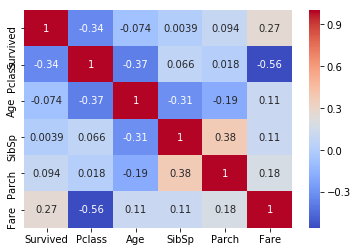

In [6]:
import seaborn as sns
print(train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr())
sns.heatmap(train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot =True, cmap = "coolwarm")

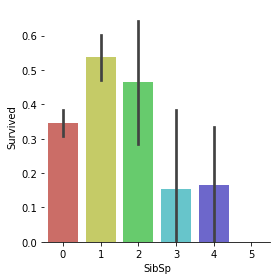

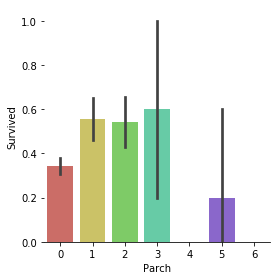

In [7]:
# SibSp & Survived
sns.factorplot(x='SibSp', y='Survived', data=train_df, kind='bar', palette = "hls").despine(left=True)
# Parch & Survived
sns.factorplot(x='Parch', y='Survived', data=train_df, kind='bar', palette = 'hls').despine(left=True)

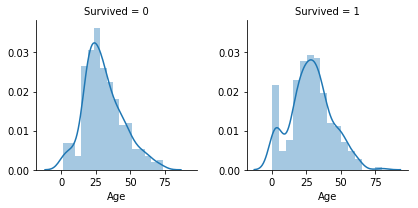

In [8]:
# Age & Survived
sns.FacetGrid(data=train_df, col='Survived').map(sns.distplot, 'Age')

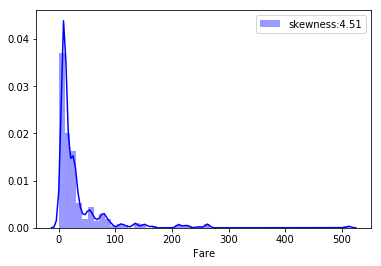

In [9]:
# 畫出fare趨勢
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean())
sns.distplot(dataset['Fare'], color='b', label='skewness:%.2f'%(dataset['Fare'].skew())).legend(loc="best")
# 趨勢太尖銳，可能造成overweight，可以做log(scale效果不會比較好)

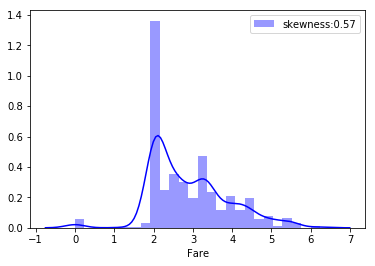

In [10]:
# 做log 
dataset['Fare'] = dataset['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
sns.distplot(dataset['Fare'], color='b',label='skewness:%.2f'%(dataset['Fare'].skew())).legend(loc='best')

### 2.Categorical values

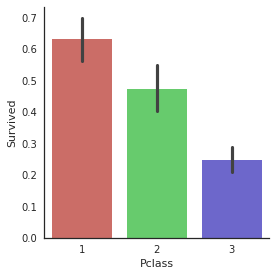

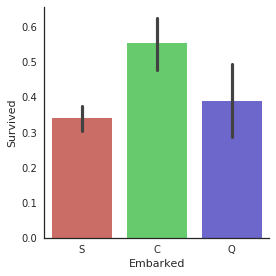

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

sns.factorplot(x='Pclass', y='Survived', data=train_df, kind='bar', palette='hls')
sns.factorplot(x='Embarked', y='Survived', data=train_df, kind='bar', palette='hls')

In [12]:
print(train_df[["Sex","Survived"]].groupby('Sex').mean())
print('------------------')
print(train_df[["Pclass","Survived"]].groupby('Pclass').mean())

        Survived
Sex             
female  0.747573
male    0.190893
------------------
        Survived
Pclass          
1       0.632075
2       0.472826
3       0.245868


## Feature Engineering

### 1. Name

In [13]:
print(dataset["Name"].head())
title = [i.split(',')[1].split('.')[0].strip() for i in dataset['Name']] 

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object


    Age Cabin Embarked      Fare  \
0  22.0   NaN        S  1.981001   
1  38.0   C85        C  4.266662   
2  26.0   NaN        S  2.070022   
3  35.0  C123        S  3.972177   
4  35.0   NaN        S  2.085672   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket Title  
0       3    male      1       0.0         A/5 21171    Mr  
1       1  female      1       1.0          PC 17599   Mrs  
2       3  female      0       1.0  STON/O2. 3101282  Miss  
3       1  female      1       1.0            113803   Mrs  
4       3    male    

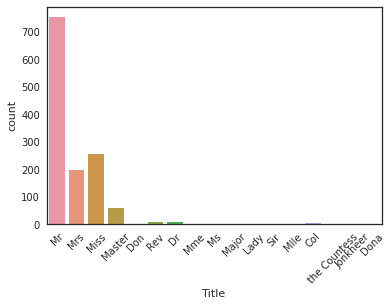

In [14]:
dataset['Title'] = pd.Series(title)
print(dataset.head())
g = sns.countplot(dataset['Title'])
g = plt.setp(g.get_xticklabels(), rotation=45)

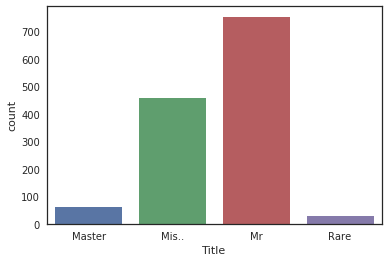

In [15]:
# 合併頻率太少的title
dataset['Title'] = dataset['Title'].replace(['Don','Rev', 'Dr',
                                            'Major', 'Lady', 'Sir',
                                            'Col', 'Capt', 'the Countess',
                                            'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].map({'Master': 0, 'Mrs':1,'Miss':1,'Mme':1,'Ms':1,'Mlle':1,
                                     'Mr':2,'Rare':3})

g = sns.countplot(dataset['Title']).set_xticklabels(['Master', 'Mis..', 'Mr', 'Rare'])

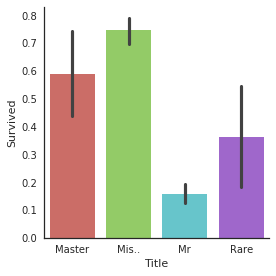

In [16]:
sns.factorplot(x='Title', y='Survived', data= dataset, kind='bar', palette='hls').set_xticklabels(['Master', 'Mis..', 'Mr', 'Rare'])
# It is interesting to note that passengers with rare title have more chance to survive.

In [17]:
# drop name feature
dataset.drop(labels=['Name'], axis=1, inplace=True)
dataset.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1.981001,0,1,3,male,1,0.0,A/5 21171,2
1,38.0,C85,C,4.266662,0,2,1,female,1,1.0,PC 17599,1
2,26.0,NaN,S,2.070022,0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,3.972177,0,4,1,female,1,1.0,113803,1
4,35.0,NaN,S,2.085672,0,5,3,male,0,0.0,373450,2


### 2. FamilySize

In [18]:
dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1
dataset.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize
0,22.0,NaN,S,1.981001,0,1,3,male,1,0.0,A/5 21171,2,2
1,38.0,C85,C,4.266662,0,2,1,female,1,1.0,PC 17599,1,2
2,26.0,NaN,S,2.070022,0,3,3,female,0,1.0,STON/O2. 3101282,1,1
3,35.0,C123,S,3.972177,0,4,1,female,1,1.0,113803,1,2
4,35.0,NaN,S,2.085672,0,5,3,male,0,0.0,373450,2,1


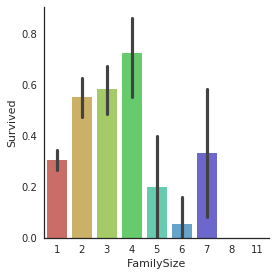

In [19]:
sns.factorplot('FamilySize', 'Survived', data=dataset, kind='bar', palette='hls')

### 3. IsAlone

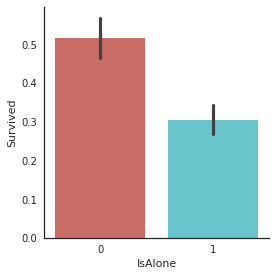

In [20]:
dataset['IsAlone'] = dataset.FamilySize.apply(lambda x: 1 if x == 1 else 0)
sns.factorplot('IsAlone', 'Survived', data=dataset, kind='bar', palette='hls')

## Training

In [ ]:
# preprocessing
dataset['Age'] = dataset['Age'].fillna(train_df['Age'].mean())
dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1})

dataset['Embarked'] = dataset['Embarked'].fillna('S')
dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2})

data = dataset[['Pclass','Sex', 'Age', 'SibSp','FamilySize',
                'IsAlone', 'Parch', 'Fare', 'Embarked', 'Title', 'Survived']]
data.head()

In [ ]:
train_data = data[:len(train_df)]
test_data = data[len(train_df):]

In [ ]:
test_data.drop(labels=['Survived'], axis=1, inplace=True)
test_data.head()

In [ ]:
X_train = train_data.values[:, :-1]
y_train = train_data.values[:, -1:]


## Model Selection

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10)

In [ ]:
# model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
# 
from sklearn.model_selection import cross_val_score

classifiers = []
classifiers.append(SVC())
classifiers.append(RandomForestClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(AdaBoostClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(MLPClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(XGBClassifier())

cv_results = []
for clf in classifiers:
    cv_results.append(cross_val_score(clf, X_train, y_train.ravel(), scoring='accuracy', cv=kfold, n_jobs=4))

cv_means = []
cv_std = []
for result in cv_results:
    cv_means.append(result.mean())
    cv_std.append(result.std())
    
cv_df = pd.DataFrame({'CrossValMeans': cv_means, 'CrossValerrors': cv_std,
                      'Algo': ['SVC', 'RFC', 'GBC', 'ETC', 'ABC', 'DTC', "MLP", 'KNC', "LR", 'XGB']})
sns.barplot(x='CrossValMeans', y='Algo', data=cv_df, palette='Set3', **{'xerr':cv_std})

## GridSearchCV
with GBC SVC ABC XGB

In [ ]:
from sklearn.model_selection import GridSearchCV
# Gradient boosting tunning
# https://www.cnblogs.com/pinard/p/6143927.html
GBC = GradientBoostingClassifier()
gbc_param_grid = {'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              }

gsGBC = GridSearchCV(estimator=GBC, param_grid=gbc_param_grid, n_jobs=4, verbose=1)
gsGBC.fit(X_train, y_train.ravel())

GBC_best = gsGBC.best_estimator_
# Best score
gsGBC.best_score_

In [ ]:
### SVC classifier tunning
from sklearn.svm import SVC
SVC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100]}
gsSVC = GridSearchCV(estimator=SVC, param_grid=svc_param_grid, n_jobs=4, verbose=1)
gsSVC.fit(X_train, y_train.ravel())

SVC_best = gsSVC.best_estimator_
gsSVC.best_score_

In [ ]:
# Adaboost
# https://www.cnblogs.com/pinard/p/6136914.html
DTC = DecisionTreeClassifier()

ABC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators" :[100, 200],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsABC = GridSearchCV(estimator=ABC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsABC.fit(X_train,y_train.ravel())

ABC_best = gsABC.best_estimator_

gsABC.best_score_

In [ ]:
# XGB
# https://xgboost.readthedocs.io/en/latest/python/python_api.html
XGB = XGBClassifier()
xgb_param_grid = {'n_estimators': [100, 150, 200],
                  'max_depth': [3, 5, 10],
                  "learning_rate":  [0.001, 0.01, 0.1, 0.3,1.5]}
gsXGB = GridSearchCV(estimator=XGB, param_grid=xgb_param_grid, n_jobs=4, verbose=1)
gsXGB.fit(X_train, y_train.ravel())

XGB_best = gsXGB.best_estimator_
gsXGB.best_score_

In [ ]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[('gbc', GBC_best), ('svc', SVC_best),
                                      ('ada', ABC_best), ('xgb', XGB_best)], voting='soft', n_jobs=4)
votingC.fit(X_train, y_train.ravel())

In [ ]:
prediction = votingC.predict(test_data.values)

In [ ]:
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'],'Survived': prediction.astype(int)})
print(submission.head())
submission.to_csv('titanic.csv', index=False)

In [ ]:
submission

## Pratice for feature selection

### new classifier base on importance features
```python
X_train.shape
```
```python
# feature importmance
feature_num = RFC.feature_importances_.shape[0]

ax = sns.barplot(x=list(range(feature_num)),y=RFC.feature_importances_)
ax.set_title('feature importmance')
```
```python
importance_feature_name = ['Pclass','Sex', 'Age', 'Fare', 'Survived']
data2 = df[importance_feature_name]
importance_features = data2.values[:, :-1]
importance_labels = data2.values[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(importance_features, importance_labels, test_size=0.2, shuffle=True)
RFC.fit(X_train, y_train.ravel())
RFC.score(X_test, y_test.ravel())
```